In [27]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [28]:
import h5py
import hdc
import numpy as np
from sklearn import svm
from itertools import combinations
import scipy.io as sio
from sklearn_lvq import GlvqModel
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm

dataName = 'allHV.npz'
emgHVType = 'hvRel' # hvRel hvRelAcc hvAbs hvAbsAcc
contextType = 'none' # none random
clusterType = 'single' # single separate auto
autoThreshold = 0 # 0 - 100
numTrainPositions = 1 # 1 - 8
crossTrial = 'within' # cross within
doLVQ = 'lvqOn' # lvqOn lvqOff
numIters = 1

if clusterType == 'auto':
    matName = emgHVType + '_' + contextType + '_' + clusterType + '_' + str(autoThreshold) + '_' + str(numTrainPositions) + '_' + crossTrial + '_' + doLVQ + '_' + str(numIters) + '.mat'
else:
    matName = emgHVType + '_' + contextType + '_' + clusterType + '_' + str(numTrainPositions) + '_' + crossTrial + '_' + doLVQ +  '_' + str(numIters) + '.mat'

autoThreshold = float(autoThreshold/100)


allHV = np.load(dataName)
hv = allHV[emgHVType]
gestLabel = allHV['gestLabel']
posLabel = allHV['posLabel']
trialLabel = allHV['trialLabel']

gestures = np.unique(gestLabel)
positions = np.unique(posLabel)
trials = np.unique(trialLabel)

numGestures = len(gestures)
numPositions = len(positions)
numTrials = len(trials)

D = hv.shape[1]
numHV = 80

if contextType == 'random':
    contextVec = np.random.choice([-1.0, 1.0], size=(numPositions,D))

trainCombinations = list(combinations(np.arange(numPositions),numTrainPositions))
numCombinations = len(trainCombinations)

# output data to be put into struct
meanHDAcc = np.zeros((numCombinations,numPositions))

<IPython.core.display.Javascript object>


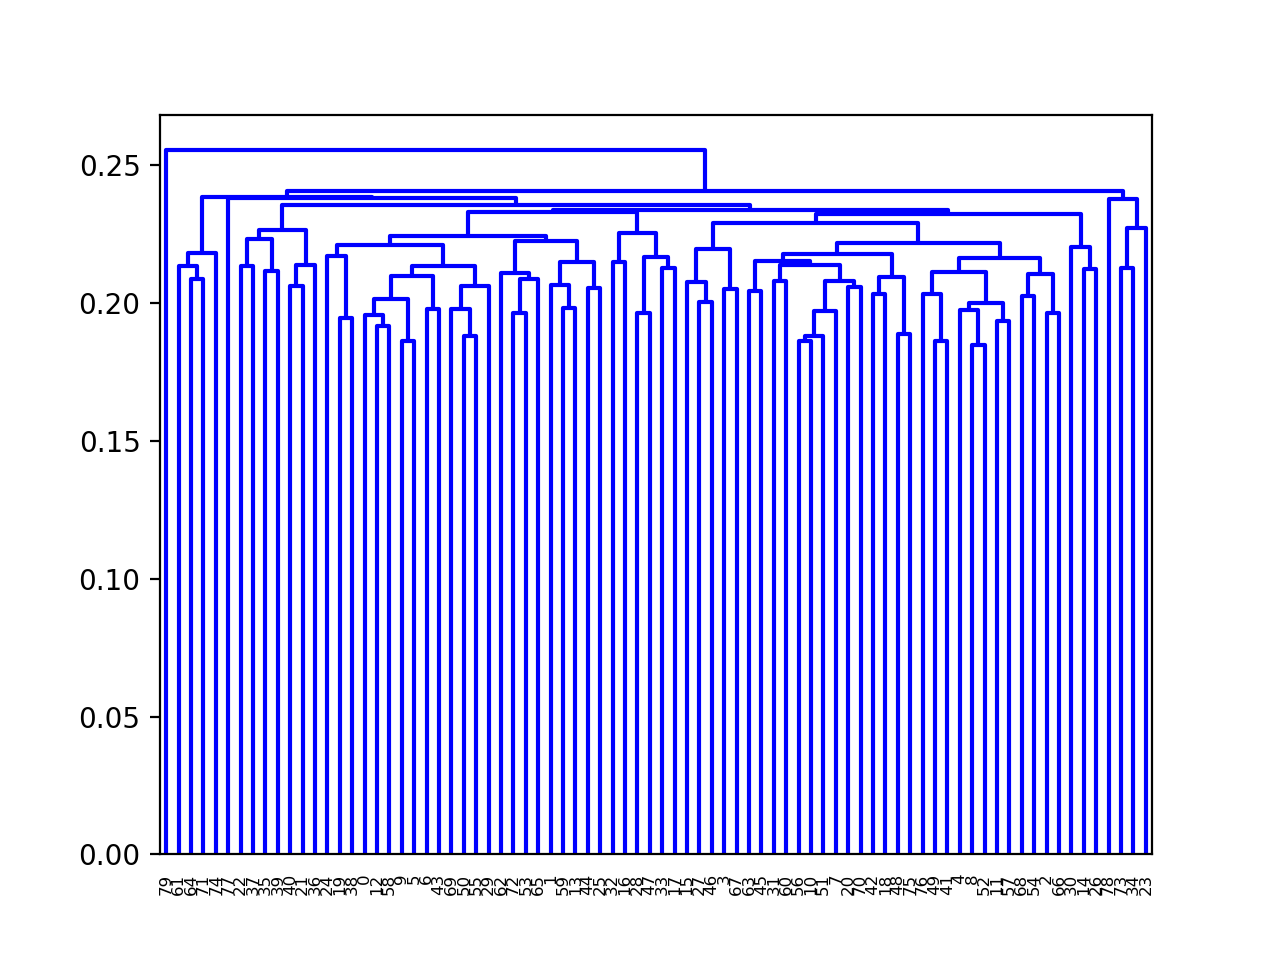

In [70]:
allowedOutliers = [0,1,2,4,8,16]
trialEps = np.zeros((len(allowedOutliers),numGestures,numPositions,numTrials))
trialNumClust = np.zeros((len(allowedOutliers),numGestures,numPositions,numTrials))
trialClustSizes = np.zeros((len(allowedOutliers),numGestures,numPositions,numTrials,numHV))
# for g in range(numGestures):
#     for p in range(numPositions):
#         for t in range(numTrials):
#             for i,o in enumerate(allowedOutliers):
#                 # find minimum hamming distance epsilon per trial
#                 minSamples = 2
#                 currEps = 0.6
#                 lowEps = 0
#                 highEps = 0.6
#                 deltaEps = highEps - lowEps
#                 print('G%d-P%d-T%d:' % (g,p,t), end=" ")
#                 numIter = 12
#                 for x in range(numIter):
#                     db = DBSCAN(eps=currEps,min_samples=minSamples,metric='hamming',n_jobs=-1).fit(hv[(gestLabel==g) & (posLabel==p) & (trialLabel==t)])
#                     numOutliers = len(db.labels_[db.labels_<0])
#                     if numOutliers <= o:
#                         highEps = currEps
#                         currEps = np.mean([currEps,lowEps])
#                         clusts = np.unique(db.labels_[db.labels_>=0])
#                         trialNumClust[i,g,p,t] = len(clusts)
#                         bestNumOutliers = len(db.labels_[db.labels_<0])
#                         clustSizes = []
#                         for c in clusts:
#                             clustSizes.append(len(db.labels_[db.labels_==c]))
#                         trialClustSizes[i,g,p,t,:] = db.labels_
                        
#                     else:
#                         lowEps = currEps
#                         currEps = np.mean([currEps,highEps])
#                     deltaEps = highEps - lowEps
#                 print('eps = %f, %d clusters with %d outliers, %d standard deviation in cluster size ' % (highEps, trialNumClust[i,g,p,t], bestNumOutliers, round(np.std(clustSizes))))
#                 trialEps[i,g,p,t] = highEps

g,p,t = (3,0,0)
# for i,o in enumerate(allowedOutliers):
#     # find minimum hamming distance epsilon per trial
#     minSamples = 2
#     currEps = 0.6
#     lowEps = 0
#     highEps = 0.6
#     deltaEps = highEps - lowEps
#     print('G%d-P%d-T%d:' % (g,p,t), end=" ")
#     numIter = 12
#     for x in range(numIter):
#         db = DBSCAN(eps=currEps,min_samples=minSamples,metric='hamming',n_jobs=-1).fit(hv[(gestLabel==g) & (posLabel==p) & (trialLabel==t)])
#         numOutliers = len(db.labels_[db.labels_<0])
#         if numOutliers <= o:
#             highEps = currEps
#             currEps = np.mean([currEps,lowEps])
#             clusts = np.unique(db.labels_[db.labels_>=0])
#             trialNumClust[i,g,p,t] = len(clusts)
#             bestNumOutliers = len(db.labels_[db.labels_<0])
#             clustSizes = []
#             for c in clusts:
#                 clustSizes.append(len(db.labels_[db.labels_==c]))
#             trialClustSizes[i,g,p,t,:] = db.labels_

#         else:
#             lowEps = currEps
#             currEps = np.mean([currEps,highEps])
#         deltaEps = highEps - lowEps
#     print('eps = %f, %d clusters with %d outliers, %d standard deviation in cluster size ' % (highEps, trialNumClust[i,g,p,t], bestNumOutliers, round(np.std(clustSizes))))
#     trialEps[i,g,p,t] = highEps
    
Z = linkage(y=hv[(gestLabel==g) & (posLabel==p) & (trialLabel==t)],method='average',metric='hamming',optimal_ordering=True)
# Z[:,2] = (Z[:,2]**2)/4/10000

dendrogram(Z)
plt.show()
